In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
# load data, skip header row
data = np.loadtxt('../large_files/train.csv', delimiter=',', skiprows=1, dtype=int)

In [138]:
def set_up_data(d):
    # shuffle the data
    np.random.shuffle(d)

    # split into X and Y (labels are first column)
    X = d[:, 1:]
    Y = d[:, 0]

    # split into train/test
    r, c = np.shape(d)
    r_90 = r // 90
    X_train, X_test = X[:-r_90], X[-r_90:]
    Y_train, Y_test = Y[:-r_90], Y[-r_90:]

    # normalize.
    # takes mean/std for each col (??)
    mu = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    
    # for all-black images (std == 0), change std to 1 to prevent /0 errors
    idx = np.where(std == 0)[0]
    assert(np.all(std[idx]) == 0)

    np.place(std, std == 0, 1)

    X_train = (X_train - mu) / std
    X_test = (X_test - mu) / std
    
    return X_train, X_test, Y_train, Y_test

In [139]:
def onehot_encode(y):
    N = len(y)
    min_y, max_y = np.min(y), np.max(y)
    K = (max_y - min_y) + 1

    encoded_y = np.zeros((N, K))

    for i in range(N):
        col_val = y[i]
        encoded_y[i, col_val] = 1
    
    return encoded_y


In [140]:
def forward(x, W, b, y_encode, y):
    a = np.dot(x, W) + b

    # softmax the outputs
    expa = np.exp(a)
    Y_pred = expa / (np.sum(expa, axis=1, keepdims=True))

    # calc loss
    tot = y_encode * np.log(Y_pred)
    loss = -tot.sum()
    
    # calc err
    # first create an array of bools. 
    # True when the argmax of your prediction equals the real y
    # Then use np.mean to get an average of all 0s (Falses) and 1s (Trues)
    err = np.mean(np.argmax(Y_pred, axis=1) != y)

    return loss, err, Y_pred

In [141]:
def weight_gradients(x, y, y_pred):
    W_grad = x.T.dot(y - y_pred)
    b_grad = (y - y_pred).sum(axis=0)

    return W_grad, b_grad

Iter 20 / 100
Train err: 0.08441277026050946
Test err: 0.0944206008583691


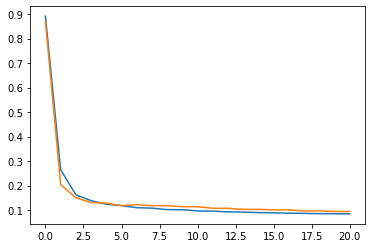

Iter 40 / 100
Train err: 0.07483025954639573
Test err: 0.09227467811158799


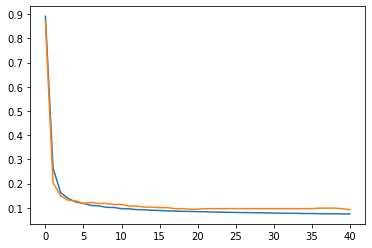

Iter 60 / 100
Train err: 0.07145952713439592
Test err: 0.09227467811158799


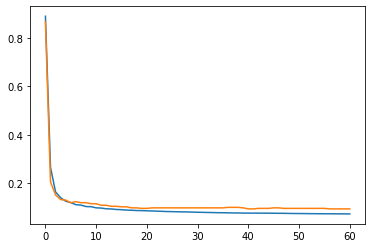

Iter 80 / 100
Train err: 0.06907593778591034
Test err: 0.09227467811158799


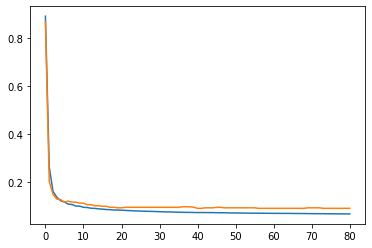

In [166]:
def linear_regression():
    X_train, X_test, Y_train, Y_test = set_up_data(data)

    # n is num samples, D is num features
    N, D = X_train.shape

    # one-hot encode Ys
    Y_train_encode = onehot_encode(Y_train)
    Y_test_encode = onehot_encode(Y_test)
    K = Y_test_encode.shape[1]
    
    # randomly initialize weights, start with 0 bias terms
    W = np.random.randn(D, K) / np.sqrt(D)
    b = np.zeros(K)

    train_losses, test_losses = [], []
    train_errors, test_errors = [], []

    lr = 0.00003
    reg = 0.0
    num_iters = 100

    for i in range(num_iters):
        # err, loss = forward(x, W, b, y_encode, y)
        train_loss, train_err, train_pred = forward(X_train, W, b, Y_train_encode, Y_train)
        train_losses.append(train_loss)
        train_errors.append(train_err)

        test_loss, test_err, test_pred = forward(X_test, W, b, Y_test_encode, Y_test)
        test_losses.append(test_loss)
        test_errors.append(test_err)

        # update weights using gradient ascent (decent)
        W_grad, b_grad = weight_gradients(X_train, Y_train_encode, train_pred)
        W += lr * (W_grad - (reg*W))
        b += lr * b_grad

        if i % 20 == 0 and i > 0:
            print(f'Iter {i} / {num_iters}')
            print(f'Train err: {train_err}')
            print(f'Test err: {test_err}')

            x = list(range(i+1))
            plt.plot(x, train_errors, x, test_errors)
            # plt.plot(x, train_errors, x, test_errors)
            # plt.plot(train_err)
            plt.show()

        

linear_regression()

In [167]:
# testing, since it's been awhile since I used np and plt

testa = np.array([[0,1,2],[3,4,1]])
print(testa)
print(np.sum(testa, axis=0, keepdims=True))
# print(np.sum(testa, axis=1, keepdims=True))
# np.argmax(testa, axis=1)
#print(testa.T)

[[0 1 2]
 [3 4 1]]
[[3 5 3]]
